In [2]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [68]:
sns.set(style="whitegrid")
color_palette = ['Red', 'Black', 'Blue']
figsize=(12,6)

In [10]:
df_dir = {}

In [30]:
pd.read_csv?

In [82]:
as_number = '13129'
sfc_duration = '3600'
opt_name = {'c':'Optimal', 'h':'Tabu Search', 'f':'First Fit'}
for opt in ['c', 'h', 'f']:
    for ar in range(1, 11):
        arrival_rate = '{:4.2f}'.format(ar*0.01)
        run_id = opt + '_' + as_number + '_' + arrival_rate + '_' + sfc_duration
        df_id = run_id.replace('.', '_')
        exec(df_id + '_df = pd.read_csv(' + '"../runs/' + run_id + '_2/sfc_data.csv' + '", index_col="timeslot")' )
        exec('df_dir["' + df_id + '"] = ' + df_id + '_df')
        df_dir[df_id]['Optimizer'] = opt_name[opt]
        df_dir[df_id]['Arrival Rate'] = arrival_rate
        df_dir[df_id]['Server Spread'] = df_dir[df_id]['server_count'] / df_dir[df_id]['vnf_count']
        df_dir[df_id]['NFV-POD Spread'] = df_dir[df_id]['co_count'] / df_dir[df_id]['vnf_count']
        print(df_id)

c_13129_0_01_3600
c_13129_0_02_3600
c_13129_0_03_3600
c_13129_0_04_3600
c_13129_0_05_3600
c_13129_0_06_3600
c_13129_0_07_3600
c_13129_0_08_3600
c_13129_0_09_3600
c_13129_0_10_3600
h_13129_0_01_3600
h_13129_0_02_3600
h_13129_0_03_3600
h_13129_0_04_3600
h_13129_0_05_3600
h_13129_0_06_3600
h_13129_0_07_3600
h_13129_0_08_3600
h_13129_0_09_3600
h_13129_0_10_3600
f_13129_0_01_3600
f_13129_0_02_3600
f_13129_0_03_3600
f_13129_0_04_3600
f_13129_0_05_3600
f_13129_0_06_3600
f_13129_0_07_3600
f_13129_0_08_3600
f_13129_0_09_3600
f_13129_0_10_3600


In [83]:
df_dir['c_13129_0_01_3600'].head()

,sfc_id,vnf_count,server_count,co_count,path_stretch,Optimizer,Arrival Rate,Server Spread,NFV-POD Spread
timeslot,,,,,,,,,
0,0,6,4,1,25,Optimal,0.01,0.666667,0.166667
0,1,4,3,2,25,Optimal,0.01,0.750000,0.500000
0,2,3,3,2,23,Optimal,0.01,1.000000,0.666667
0,3,4,4,1,28,Optimal,0.01,1.000000,0.250000
0,4,6,5,3,40,Optimal,0.01,0.833333,0.500000


In [84]:
spread_df = pd.concat(list(df_dir.values()), axis=0)

In [85]:
spread_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5477 entries, 0 to 23
Data columns (total 9 columns):
sfc_id            5477 non-null int64
vnf_count         5477 non-null int64
server_count      5477 non-null int64
co_count          5477 non-null int64
path_stretch      5477 non-null int64
Optimizer         5477 non-null object
Arrival Rate      5477 non-null object
Server Spread     5477 non-null float64
NFV-POD Spread    5477 non-null float64
dtypes: float64(2), int64(5), object(2)
memory usage: 427.9+ KB


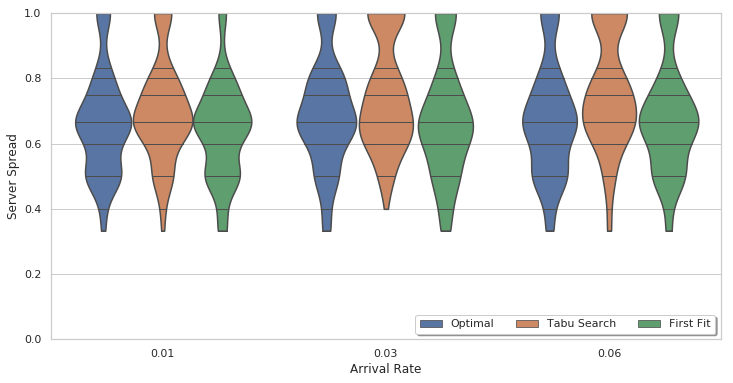

In [132]:
plt.figure(figsize=figsize)
df = ((spread_df["Arrival Rate"] == '0.01') | (spread_df["Arrival Rate"] == '0.03') | 
               (spread_df["Arrival Rate"] == '0.06'))
sns.violinplot(x="Arrival Rate", y="Server Spread", hue="Optimizer", 
               data=spread_df[df], cut=0, 
               inner="stick")
plt.ylim(0, 1.0)
plt.legend(loc='lower right', fancybox=True, shadow=True, ncol=3)

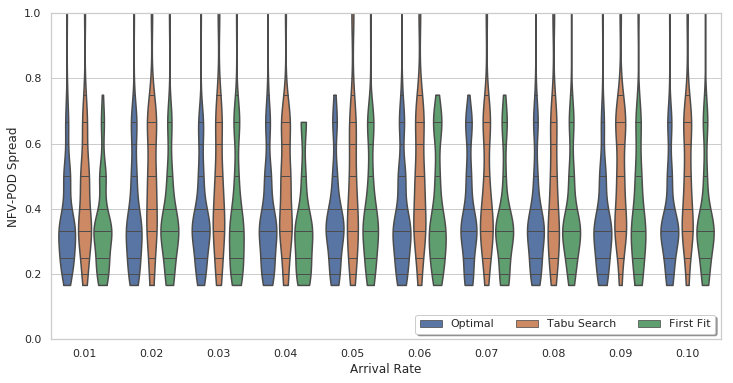

In [105]:
plt.figure(figsize=figsize)
sns.violinplot(x="Arrival Rate", y="NFV-POD Spread", hue="Optimizer", 
               data=spread_df, cut=0,
               inner="stick")
plt.ylim(0, 1.0)
plt.legend(loc='lower right', fancybox=True, shadow=True, ncol=3)

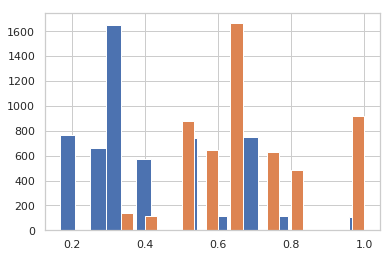

In [134]:
spread_df['NFV-POD Spread'].hist(bins=20)
spread_df['Server Spread'].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f039388c320>,
      dtype=object)

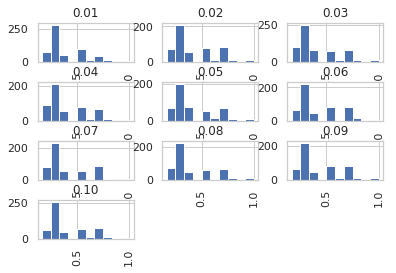

In [133]:
spread_df.hist(column='NFV-POD Spread', by='Arrival Rate')

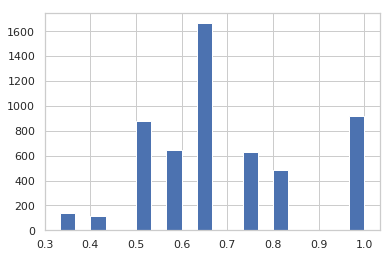

In [126]:
spread_df['Server Spread'].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03983841d0>,
      dtype=object)

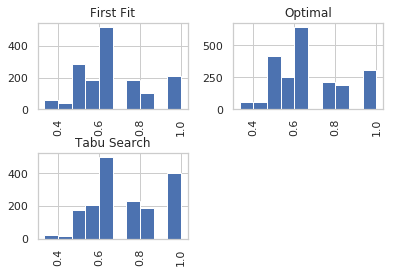

In [118]:
spread_df.hist(column='Server Spread', by='Optimizer')